### Задание 1. Написать теггер на данных с русским языком

1. проверить UnigramTagger, BigramTagger, TrigramTagger и их комбмнации
2. написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
3. сравнить все реализованные методы сделать выводы

In [53]:
import pandas as pd

In [16]:
text = """
открытое акционерное общество «Транспортные системы»
220567, Республика Беларусь, г. Минск, ул. Маяковского, 125
Тел.: + 375(17)315-45-56, 315-45-59, 315-45-73, факс: + 375(17)315-45-75, e-mail:info@ts.by
ОАО «КВАДРОТЕХНО» 603000, Российская Федерация г. Нижний Новгород
ул. Б. Покровская, 58/3
ИЗВЕЩЕНИЕ О ГОТОВНОСТИ ТОВАРА К ОТГРУЗКЕ
Настоящим сообщаем Вам, что заказанная Вами продукция согласно Контракту No 134/456-345-08-090 от 27.03.2008 г., а именно:
• полуприцеп без тентовой надстройки АВС-987654-2020 в количестве 12 ед.;
• полуприцеп без тентовой надстройки АВС-987654-2030 в количестве 8 ед.; изготовлена и готова к отгрузке в адрес Покупателя по вышеуказанному Контракту.
Комплектация продукции согласно условиям контракта включает:
• для полуприцепа АВС-987654-2020 – шины Continental 385/65R22.5, опорное устройство Jost, оси BPW с тормозными механизмами барабанного типа, 1 запасное колесо, с настилом, держатель на одно запасное колесо, грунтование цинкосодержащим материалом с толщиной покрытия 60 микрон, без нанесения внешнего окрасочного покрытия, без бортов, стоек, обрешетки, тента, электрооборудование белорусского производства;
• для полуприцепа АВС-987654-2030 – шины Continental 385/65R22.5, опорное устройство Jost, оси BPW с тормозными механизмами барабанного типа, 1 запасное колесо, с настилом, держатель на одно запасное колесо, грунтование цинкосодержащим материалом с толщиной покрытия 60 микрон, без нанесения внешнего окрасочного покрытия, без бортов, стоек, обрешетки, тента, электрооборудование «Aspock», пневматическая система «Knorr-Bremse».
Согласно условиям Контракта, продукция может быть отгружена в срок не позднее 10 (десяти) рабочих дней после получения от Вас разрешения на поставку.
Дата Ф.И.О., подпись уполномоченного лица"""

In [4]:
import nltk

In [341]:
tokens =  nltk.word_tokenize(text)
tokens[:10]

['Марио',
 'Монти',
 'подаст',
 'в',
 'отставку',
 'с',
 'должности',
 'премьер-министра',
 'Италии',
 'Фото']

In [6]:
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger

#### Загрузка предобученного датасета

In [52]:
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /Users/maximdoroshenko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

#### Теггирование с помощью предобученного теггера averaged_perceptron_tagger (датасет averaged_perceptron_tagger_ru)

In [344]:
nltk.pos_tag(tokens, lang='rus')[:30]

[('Марио', 'S'),
 ('Монти', 'S'),
 ('подаст', 'V'),
 ('в', 'PR'),
 ('отставку', 'S'),
 ('с', 'PR'),
 ('должности', 'S'),
 ('премьер-министра', 'S'),
 ('Италии', 'S'),
 ('Фото', 'S'),
 (':', 'NONLEX'),
 ('Reuters', 'NONLEX'),
 ('Фото', 'S'),
 (':', 'NONLEX'),
 ('Reuters', 'NONLEX'),
 ('Фото', 'S'),
 (':', 'NONLEX'),
 ('Reuters', 'NONLEX'),
 ('Фото', 'S'),
 (':', 'NONLEX'),
 ('Reuters', 'NONLEX'),
 ('Премьер-министр', 'S'),
 ('Италии', 'S'),
 ('Марио', 'S'),
 ('Монти', 'S'),
 ('подтвердил', 'V'),
 ('намерение', 'S'),
 ('подать', 'V'),
 ('прошение', 'S'),
 ('об', 'PR')]

In [42]:
nltk.download('tagsets')
# nltk.download() # Показать все возможные ресурсы
nltk.help.upenn_tagset('A=f')

No matching tags found.


[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/maximdoroshenko/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


Найти описание тегов не удалось

In [345]:
# Присвоение дефолтного тега всем токенам (бесполезно при единичном вызове)
nltk.DefaultTagger('NN').tag(tokens)[:5]

[('Марио', 'NN'),
 ('Монти', 'NN'),
 ('подаст', 'NN'),
 ('в', 'NN'),
 ('отставку', 'NN')]

In [82]:
train_data = [[('открытое','ПРИЛ'),
               ('общество','СУЩ'),
               ('Транспортные','ПРИЛ'),
               ('Республика','СУЩ'),
               ('413-32-11', 'ТЕЛ')]]
tags = [t.tag(tokens) for t in [UnigramTagger(train_data), BigramTagger(train_data), TrigramTagger(train_data)]]
[t[:5] for t in tags]

[[('открытое', 'ПРИЛ'),
  ('акционерное', None),
  ('общество', 'СУЩ'),
  ('«', None),
  ('Транспортные', 'ПРИЛ')],
 [('открытое', 'ПРИЛ'),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)],
 [('открытое', 'ПРИЛ'),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)]]

In [83]:
train_data = [[('341210','ИНДЕКС'),
               ('Республика Узбекистан','СТРАНА'),
               ('г. Москва','ГОРОД'),
               ('ул. Чайковского','УЛИЦА'),
               ('103', 'Дом'),
              ('АВС-987654-2020', 'НОМЕНКЛАТУРА'),
              ('mai@gmail.com', 'EMAIL'),
              ('11.04.2013', 'ДАТА')]]
tags = [t.tag(tokens) for t in [UnigramTagger(train_data), BigramTagger(train_data), TrigramTagger(train_data)]]
[t[:5] for t in tags]

[[('открытое', None),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)],
 [('открытое', None),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)],
 [('открытое', None),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)]]

Данные averaged_perceptron_tagger_ru сохранились в /Users/maximdoroshenko/nltk_data, можно использовать ресурс в качестве тренировочного датасета для необученных теггеров (UnigramTagger, BigramTagger и др)

In [74]:
# Загрузка массива служебных справочников
nltk_tag_data = pd.read_pickle('/Users/maximdoroshenko/nltk_data/taggers/averaged_perceptron_tagger_ru/averaged_perceptron_tagger_ru.pickle')

In [73]:
# Преобразование словаря {слово: тег} в [(слово, тег)], данные в nltk_tag_data[1]
nltk_train_data = [(k, v) for k, v in nltk_tag_data[1].items()]

In [84]:
t_data = [nltk_train_data]
tags = [t.tag(tokens) for t in [UnigramTagger(t_data), BigramTagger(t_data), TrigramTagger(t_data)]]
[t[:5] for t in tags]

[[('открытое', None),
  ('акционерное', None),
  ('общество', 'S'),
  ('«', 'NONLEX'),
  ('Транспортные', None)],
 [('открытое', None),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)],
 [('открытое', None),
  ('акционерное', None),
  ('общество', None),
  ('«', None),
  ('Транспортные', None)]]

#### Комбинация теггеров

In [91]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NN') 
tag = backoff_tagger(t_data,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff) 
  
# tag.evaluate(test_data) # Размеченных тестовых данных нет
tag.tag(tokens)[:15]

[('открытое', 'NN'),
 ('акционерное', 'NN'),
 ('общество', 'S'),
 ('«', 'NONLEX'),
 ('Транспортные', 'NN'),
 ('системы', 'S'),
 ('»', 'NN'),
 ('220567', 'NN'),
 (',', 'NONLEX'),
 ('Республика', 'NN'),
 ('Беларусь', 'NN'),
 (',', 'NONLEX'),
 ('г.', 'NN'),
 ('Минск', 'NN'),
 (',', 'NONLEX')]

### Вывод:
При использовании встроенных некомбинированных теггеров чуда не произошло, даже на довольно большом предобученном датасете. Теггеры сильно реагируют на похожие слова и встречаемость этих слов в корпусе. Также важен порядок для Bigram и Trigram. Замечу, что из предобученного датасета была взята только связь <слово: тег>, но не частота слов в корпусе.

Для комбинации теггеров результат намного лучше.

Сравнительно хорошо отработал предобученный теггер averaged_perceptron_tagger, правда к нему не удалось найти таблицу описаний тегов.

Примечательно, что обучать можно со своими значениями тегов, не привязываясь к стандартным названиями тегов в nltk.

Для обучаемых теггов требуются хорошие датасеты обучения.

Если есть возможность описать теги регулярными выражениями, следует использовать RegexpTagger.

### Ручная подготовка датасета для обучения

In [96]:
import pymorphy2
import re

In [130]:
text = 'Настоящим сообщаем Вам, что заказанная Вами продукция согласно Контракту No 134/456-345-08-090 от 27.03.2008 г.'

In [131]:
def preprocess(text):
    text = " ".join(word.lower() for word in text.split()) #lowercasing and removing short words 
    text = re.sub('\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', text) #deleting newlines and line-breaks
#     text = re.sub('[.,:;%©?*,!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text) #deleting symbols  
    text = " ".join(pymorphy2.MorphAnalyzer().parse(word)[0].normal_form for word in text.split())
    return text

In [132]:
text = preprocess(text)
text

'настоящий сообщать вам, что заказать вы продукция согласно контракт no 134/456-345-08-090 от 27.03.2008 г.'

In [133]:
tokens = nltk.word_tokenize(text)
tokens

['настоящий',
 'сообщать',
 'вам',
 ',',
 'что',
 'заказать',
 'вы',
 'продукция',
 'согласно',
 'контракт',
 'no',
 '134/456-345-08-090',
 'от',
 '27.03.2008',
 'г',
 '.']

In [134]:
# Помощь в генерации датасета предобученным тэггером nltk
pretrained_data = nltk.pos_tag(tokens, lang='rus')
pretrained_data

[('настоящий', 'A=m'),
 ('сообщать', 'V'),
 ('вам', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('заказать', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('контракт', 'S'),
 ('no', 'NONLEX'),
 ('134/456-345-08-090', 'NONLEX'),
 ('от', 'PR'),
 ('27.03.2008', 'NUM=ciph'),
 ('г', 'S'),
 ('.', 'NONLEX')]

In [136]:
# Дополнение предобученного датасета параметрами ITEM-NUMBER и DATE
train_data = [('настоящий', 'A=m'),
 ('сообщать', 'V'),
 ('вам', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('заказать', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('контракт', 'S'),
 ('no', 'NONLEX'),
 ('134/456-345-08-090', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('27.03.2008', 'DATE'),
 ('г', 'S'),
 ('.', 'NONLEX')]
train_data

[('настоящий', 'A=m'),
 ('сообщать', 'V'),
 ('вам', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('заказать', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('контракт', 'S'),
 ('no', 'NONLEX'),
 ('134/456-345-08-090', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('27.03.2008', 'DATE'),
 ('г', 'S'),
 ('.', 'NONLEX')]

In [137]:
# Проверка
UnigramTagger([train_data]).tag(tokens)

[('настоящий', 'A=m'),
 ('сообщать', 'V'),
 ('вам', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('заказать', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('контракт', 'S'),
 ('no', 'NONLEX'),
 ('134/456-345-08-090', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('27.03.2008', 'DATE'),
 ('г', 'S'),
 ('.', 'NONLEX')]

In [138]:
# Тестовые данные
text = 'Настоящим уведомляем Вас, что купленная Вами продукция согласно Счёту No 125/410-345-98-092 от 13.04.2015 г. и 165/210-395-31-222 от 14.05.2016 г.'
text

'Настоящим уведомляем Вас, что купленная Вами продукция согласно Счёту No 125/410-345-98-092 от 13.04.2015 г. и 165/210-395-31-222 от 14.05.2016 г.'

In [139]:
text = preprocess(text)
text

'настоящий уведомлять вас, что купить вы продукция согласно счёт no 125/410-345-98-092 от 13.04.2015 г. и 165/210-395-31-222 от 14.05.2016 г.'

In [140]:
tokens = nltk.word_tokenize(text)
tokens

['настоящий',
 'уведомлять',
 'вас',
 ',',
 'что',
 'купить',
 'вы',
 'продукция',
 'согласно',
 'счёт',
 'no',
 '125/410-345-98-092',
 'от',
 '13.04.2015',
 'г.',
 'и',
 '165/210-395-31-222',
 'от',
 '14.05.2016',
 'г',
 '.']

In [141]:
# Помощь в генерации тестовых данных стандартным nltk тэггером
test_data = nltk.pos_tag(tokens, lang='rus')
test_data

[('настоящий', 'A=m'),
 ('уведомлять', 'V'),
 ('вас', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('купить', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('счёт', 'S'),
 ('no', 'NONLEX'),
 ('125/410-345-98-092', 'NONLEX'),
 ('от', 'PR'),
 ('13.04.2015', 'NUM=ciph'),
 ('г.', 'S'),
 ('и', 'CONJ'),
 ('165/210-395-31-222', 'S'),
 ('от', 'PR'),
 ('14.05.2016', 'NUM=ciph'),
 ('г', 'S'),
 ('.', 'NONLEX')]

In [142]:
# Ручная корректировка для дополнительных тэггов ITEM-NUMBER и DATE
test_data = [('настоящий', 'A=m'),
 ('уведомлять', 'V'),
 ('вас', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'CONJ'),
 ('купить', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'S'),
 ('согласно', 'ADV'),
 ('счёт', 'S'),
 ('no', 'NONLEX'),
 ('125/410-345-98-092', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('13.04.2015', 'DATE'),
 ('г.', 'S'),
 ('и', 'CONJ'),
 ('165/210-395-31-222', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('14.05.2016', 'DATE'),
 ('г', 'S'),
 ('.', 'NONLEX')]

In [151]:
# Тестирование UnigramTagger
bigram_tagger = BigramTagger([train_data])
display(bigram_tagger.tag(tokens), bigram_tagger.evaluate([test_data]))

[('настоящий', 'A=m'),
 ('уведомлять', None),
 ('вас', None),
 (',', None),
 ('что', None),
 ('купить', None),
 ('вы', None),
 ('продукция', None),
 ('согласно', None),
 ('счёт', None),
 ('no', None),
 ('125/410-345-98-092', None),
 ('от', None),
 ('13.04.2015', None),
 ('г.', None),
 ('и', None),
 ('165/210-395-31-222', None),
 ('от', None),
 ('14.05.2016', None),
 ('г', None),
 ('.', None)]

0.047619047619047616

Удивительно, но BigramTagger почти ничего не разобрал, хотя в обоих датасетах присутствуют одинаковые слова.

In [152]:
tagger = backoff_tagger(t_data,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff)
display(tagger.tag(tokens), tagger.evaluate([test_data]))

[('настоящий', 'A=m'),
 ('уведомлять', 'NN'),
 ('вас', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'NN'),
 ('купить', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'NN'),
 ('согласно', 'NN'),
 ('счёт', 'S'),
 ('no', 'NN'),
 ('125/410-345-98-092', 'NN'),
 ('от', 'PR'),
 ('13.04.2015', 'NN'),
 ('г.', 'NN'),
 ('и', 'CONJ'),
 ('165/210-395-31-222', 'NN'),
 ('от', 'PR'),
 ('14.05.2016', 'NN'),
 ('г', 'S'),
 ('.', 'NONLEX')]

0.5238095238095238

Комбинированный теггер показал результат не сильно лучше

#### Добавление кастомных тэггеров

In [153]:
from nltk.tag import SequentialBackoffTagger

In [189]:
class ItemNumberTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
        self.reg_exp = r'\d{3}\/\d{3}-\d{3}-\d{2}-\d{3}'
        self.tag_name = 'ITEM-NUMBER'
        
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        if re.findall(self.reg_exp, word):  # word.lower() для цифр избыточно
             return self.tag_name
        else:
             return None
            
class DateNumberTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
        self.reg_exp = r'\d{2}.\d{2}.\d{4}'
        self.tag_name = 'DATE'
        
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        if re.findall(self.reg_exp, word):  # word.lower() для цифр избыточно
             return self.tag_name
        else:
             return None

In [190]:
backoff = DefaultTagger('NN') 

tagger = backoff_tagger(t_data,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff)

item_number_tagger = ItemNumberTagger(tagger) # backoff - Комбинированный теггер
date_number_tagger = DateNumberTagger(item_number_tagger) # item_number_tagger в качестве backoff

display(date_number_tagger.tag(tokens), date_number_tagger.evaluate([test_data]))

[('настоящий', 'A=m'),
 ('уведомлять', 'NN'),
 ('вас', 'S-PRO'),
 (',', 'NONLEX'),
 ('что', 'NN'),
 ('купить', 'V'),
 ('вы', 'S-PRO'),
 ('продукция', 'NN'),
 ('согласно', 'NN'),
 ('счёт', 'S'),
 ('no', 'NN'),
 ('125/410-345-98-092', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('13.04.2015', 'DATE'),
 ('г.', 'NN'),
 ('и', 'CONJ'),
 ('165/210-395-31-222', 'ITEM-NUMBER'),
 ('от', 'PR'),
 ('14.05.2016', 'DATE'),
 ('г', 'S'),
 ('.', 'NONLEX')]

0.7142857142857143

Метрика заметно улучшилась

### NER

#### Задание 2. Проверить насколько хорошо работает NER

данные брать из http://www.labinform.ru/pub/named_entities/
1. проверить NER из nltk/spacy/deeppavlov
2. написать свой нер попробовать разные подходы
- передаём в сетку токен и его соседей
- передаём в сетку только токен
- свой вариант
3. сравнить ваши реализованные подходы на качество (вывести precision/recall/f1_score)

#### Подготовка данных

In [346]:
path = 'ner_data/Collection3/04_12_12g.'
text = open(path + 'txt', "r").read()
tokens = nltk.pos_tag(nltk.word_tokenize(text), lang='rus')
tokens[:10]

[('Марио', 'S'),
 ('Монти', 'S'),
 ('подаст', 'V'),
 ('в', 'PR'),
 ('отставку', 'S'),
 ('с', 'PR'),
 ('должности', 'S'),
 ('премьер-министра', 'S'),
 ('Италии', 'S'),
 ('Фото', 'S')]

In [247]:
ann_df = pd.read_csv(path + 'ann', delimiter='\t', header=None)
ann_df.columns = ['id', 'type', 'text']
ann_df.head()

,id,type,text
0,T1,PER 2 13,Марио Монти
1,T2,LOC 61 67,Италии
2,T3,ORG 75 82,Reuters
3,T4,ORG 89 96,Reuters
4,T5,ORG 103 110,Reuters


In [248]:
ann_df['tmp'] = ann_df.type.str.split(' ')
ann_df['type'] = ann_df['tmp'].str[0]
ann_df['start'] = ann_df['tmp'].str[1]
ann_df['end'] = ann_df['tmp'].str[2]
ann_df = ann_df.drop('tmp', 1)
ann_df.head()

,id,type,text,start,end
0,T1,PER,Марио Монти,2,13
1,T2,LOC,Италии,61,67
2,T3,ORG,Reuters,75,82
3,T4,ORG,Reuters,89,96
4,T5,ORG,Reuters,103,110


#### NLTK

In [254]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/maximdoroshenko/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/maximdoroshenko/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# При вызове nltk.ne_chunk(tokens) появляется ошибка The Ghostscript executable isn't found.
# brew install ghostscript

In [259]:

ner_nltk = {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(tokens) if hasattr(chunk, 'label') }
ner_nltk

set()

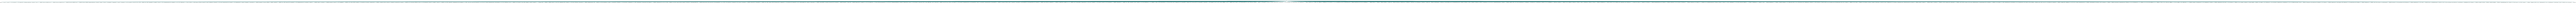

In [258]:
nltk.ne_chunk(tokens)

NLTK ничего не нашёл в русском тексте

#### Spacy

In [263]:
# !pip install -U spacy
# !python -m spacy info

In [267]:
# !python -m spacy download ru_core_news_sm
# !python -m spacy download ru_core_news_md # 40 MB
# !python -m spacy download ru_core_news_lg # 500 MB

In [268]:
import spacy
from spacy.lang.ru.examples import sentences 

nlp = spacy.load("ru_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple рассматривает возможность покупки стартапа из Соединённого Королевства за $1 млрд
Apple PROPN nsubj
рассматривает VERB ROOT
возможность NOUN obj
покупки NOUN nmod
стартапа NOUN nmod
из ADP case
Соединённого ADJ amod
Королевства PROPN nmod
за ADP case
$ SYM nmod
1 NUM appos
млрд NOUN punct


In [270]:
from spacy import displacy

In [272]:
nlp = spacy.load("ru_core_news_sm")
article = nlp(doc)
displacy.render(article, jupyter=True, style='ent')

In [273]:
nlp = spacy.load("ru_core_news_sm")
article = nlp(text)
displacy.render(article, jupyter=True, style='ent')

In [278]:
# Результат с использованием ru_core_news_md совпадает ru_core_news_sm
# nlp = spacy.load("ru_core_news_md")
# article = nlp(text)
# displacy.render(article, jupyter=True, style='ent')

In [277]:
# for token in nlp(text):
#     print(token.text, token.pos_, token.dep_)
# Малополезная информация

#### Вывод: Spacy визуально показывает достаточно хороший результат.
Пропуски присутствуют, но, возможно с использованием большого сета ru_core_news_lg - пропусков станет меньше.

Spacy docs:https://spacy.io/models/ru#ru_core_news_lg

#### Другие инструменты

#### Stanza

In [281]:
# !pip install stanza
import stanza
# stanza.download('ru')
def stanza_nlp_ru(text):
  nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
  doc = nlp(text)
  print(*[f'entity: {ent.text}\ttype: {ent.type}' for sent in doc.sentences for ent in sent.ents], sep='\n')
stanza_nlp_ru(text)

2022-06-13 12:25:12 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2022-06-13 12:25:12 INFO: Use device: cpu
2022-06-13 12:25:12 INFO: Loading: tokenize
2022-06-13 12:25:12 INFO: Loading: ner
2022-06-13 12:25:13 INFO: Done loading processors!


entity: Марио Монти	type: PER
entity: Италии	type: LOC
entity: Фото: Reuters Фото: Reuters Фото: Reuters
Фото: Reuters	type: MISC
entity: Италии	type: LOC
entity: Марио Монти	type: PER
entity: Президентом страны	type: ORG
entity: Джорджо Наполитано	type: PER
entity: Reuters	type: ORG
entity: Народ свободы	type: ORG
entity: Монти	type: PER
entity: Сильвио Берлускони	type: PER
entity: Монти	type: PER
entity: Монти	type: PER
entity: Президент	type: ORG
entity: итальянские	type: MISC
entity: Берлускони	type: PER
entity: Берлускони	type: PER
entity: Италии	type: LOC
entity: Берлускони	type: PER
entity: Берлускони	type: PER
entity: Mediaset	type: ORG
entity: Берлускони	type: PER
entity: Берлускони	type: PER
entity: Руби	type: MISC
entity: Берлускони	type: PER
entity: Демократической партии Италии	type: ORG
entity: Пьер Луиджи Берсани	type: PER
entity: Берсани	type: PER
entity: Флоренции	type: LOC
entity: Маттео Ренци	type: PER
entity: Италии	type: LOC
entity: Демократическая партия	type: ORG

#### Natasha

In [283]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

doc = Doc(text)
doc

Doc(text='\nМарио Монти подаст в отставку с должности премь...)

In [284]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(start=1, stop=6, text='Марио'),
 DocToken(start=7, stop=12, text='Монти'),
 DocToken(start=13, stop=19, text='подаст'),
 DocToken(start=20, stop=21, text='в'),
 DocToken(start=22, stop=30, text='отставку')]

[DocSent(start=1, stop=414, text='Марио Монти подаст в отставку с должности премьер..., tokens=[...]),
 DocSent(start=416, stop=520, text='Отметим, что ранее входившая в парламентскую коал..., tokens=[...]),
 DocSent(start=521, stop=771, text='В свою очередь 76-летний Сильвио Берлускони, кото..., tokens=[...]),
 DocSent(start=773, stop=866, text='В случае если бюджет будет принят "быстро", Монти..., tokens=[...]),
 DocSent(start=867, stop=975, text='Примечательно, что Президент имеет полномочия объ..., tokens=[...])]

In [285]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

               Марио PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
               Монти PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
              подаст VERB|Aspect=Perf|Mood=Ind|Number=Sing|Person=3|Tense=Fut|VerbForm=Fin|Voice=Act
                   в ADP
            отставку NOUN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
                   с ADP
           должности NOUN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
    премьер-министра NOUN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
              Италии PROPN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
                Фото PROPN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
                   : PUNCT
             Reuters PROPN|Foreign=Yes
                Фото PROPN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
                   : PUNCT
             Reuters PROPN|Foreign=Yes
                Фото PROPN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
                   : PUNCT
             Reuters PROPN|Foreign=Yes


In [286]:
sent.syntax.print()

                              ┌► Марио            nsubj
                              │  Монти            
┌─┌───┌─────┌─────────────┌─┌─└─ подаст           
│ │   │     │             │ │ ┌► в                case
│ │   │     │             │ └►└─ отставку         obl
│ │   │     │             │   ┌► с                case
│ │   │     │             └►┌─└─ должности        obl
│ │ ┌─│     │             ┌─└►┌─ премьер-министра nmod
│ │ │ │     │             │   └► Италии           nmod
│ │ │ │     │             └────► Фото             appos
│ │ │ │     │               ┌──► :                punct
│ │ │ │     │ ┌──────►┌───┌─│ ┌─ Reuters          acl
│ │ │ │     │ │       │   │ │ └► Фото             flat:name
│ │ │ │     │ │       │   │ │ ┌► :                punct
│ │ │ │     │ │   ┌──►│ ┌─│ └─└─ Reuters          acl
│ │ │ │     │ │   │   │ │ └►│    Фото             flat:name
│ │ │ │     │ │   │   │ │   └──► :                punct
│ │ │ │     │ │   │ ┌►│ │        Reuters          acl
│ │ │ │ 

In [287]:
doc.tag_ner(ner_tagger)
doc.ner.print()

Марио Монти подаст в отставку с должности премьер-министра Италии
PER────────                                                LOC───
Фото: Reuters Фото: Reuters Фото: Reuters
Фото: Reuters
      ORG────
Премьер-министр Италии Марио Монти подтвердил намерение подать 
                LOC─── PER────────                             
прошение об отставке после того, как парламент одобрит закон о 
государственном бюджете на 2013 г. Этот и другие вопросы глава 
кабинета обсудил в ходе двухчасовой беседы с Президентом страны 
Джорджо Наполитано, передает Reuters.
PER───────────────           ORG──── 
Отметим, что ранее входившая в парламентскую коалицию партия "Народ 
                                                              ORG───
свободы" отказала Монти в поддержке. В свою очередь 76-летний Сильвио 
───────           PER──                                       PER─────
Берлускони, который является лидером указанной партии, за несколько 
──────────                                          

#### NN

In [291]:
#!pip install corus

In [347]:
import corus
from corus import load_ne5

dir = 'ner_data/Collection3/'
records = load_ne5(dir)

In [293]:
from razdel import tokenize

words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [294]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])
df_words.head()

,word,tag
0,Д,PER
1,.,PER
2,Медведев,PER
3,назначил,OUT
4,ряд,OUT


In [295]:
df_words['tag'].value_counts()

OUT    219014
PER     21178
ORG     16122
LOC      8913
Name: tag, dtype: int64

In [296]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [297]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [300]:
train_x.apply(len).max(axis=0)

55

In [301]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [302]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [303]:
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [304]:
embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)
        
        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)
        
        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob

In [305]:
mmodel = modelNER()
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12433/12433 [==============================] - 140s 11ms/step - loss: 0.2728 - accuracy: 0.9167 - val_loss: 0.1935 - val_accuracy: 0.9394
Epoch 2/3
12433/12433 [==============================] - 132s 11ms/step - loss: 0.1151 - accuracy: 0.9645 - val_loss: 0.1942 - val_accuracy: 0.9419
Epoch 3/3
12433/12433 [==============================] - 131s 11ms/step - loss: 0.1017 - accuracy: 0.9669 - val_loss: 0.1921 - val_accuracy: 0.9416


In [312]:
preds = mmodel.predict(valid_x)
labels_valid_y = encoder.inverse_transform(valid_y) # Обратная трансформация индексов в название

In [336]:
preds_proba_max = [np.argmax(l) for l in preds] # Максимальная вероятность из списка вероятностей
preds_proba = encoder.inverse_transform(preds_proba_max) # Обратная трансформация индексов в название

In [338]:
from sklearn.metrics import classification_report

print(classification_report(labels_valid_y, preds_proba))

              precision    recall  f1-score   support

         LOC       0.88      0.86      0.87      2115
         ORG       0.92      0.58      0.71      4037
         OUT       0.94      0.99      0.97     54851
         PER       0.97      0.71      0.82      5304

    accuracy                           0.94     66307
   macro avg       0.93      0.79      0.84     66307
weighted avg       0.94      0.94      0.94     66307

